In [2]:
# Smart Aadhaar Analytics Platform
# analysis.ipynb
# ---------------------------------------------
# This notebook performs:
# 1. Data loading & preprocessing
# 2. Exploratory Data Analysis (EDA)
# 3. Enrolment prediction using XGBoost
# 4. Anomaly detection using Isolation Forest
# 5. Regional clustering using K-Means
# ---------------------------------------------

# ================================
# Cell 1: Import Required Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from xgboost import XGBRegressor

# ================================
# Cell 2: Load Dataset
# ================================
# Dataset: Aadhaar Enrolment Statistics by State, District and Age Group

df = pd.read_csv("/content/aadhaar_data.csv")
df.head()

# ================================
# Cell 3: Basic Data Info
# ================================
df.info()

# ================================
# Cell 4: Data Preprocessing
# ================================
# NOTE: Dataset columns are lowercase (date, state, district, etc.)

# Convert date column to datetime
# The dataset contains dates like 13-09-2025 (DD-MM-YYYY), so we enable dayfirst
# and allow mixed formats safely

df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Create time-based features
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# -------------------------------
# Create Total Enrolments column
# -------------------------------
# Total Enrolments = sum of all age groups
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
df['Total_Enrolments'] = df[age_cols].sum(axis=1)

# Verify calculation
df[['age_0_5', 'age_5_17', 'age_18_greater', 'Total_Enrolments']].head()

# Check missing values after parsing
df.isnull().sum()


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features & target
features = ['Month', 'Year', 'age_0_5', 'age_5_17', 'age_18_greater']
X = df[features]
y = df['Total_Enrolments']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))


ModuleNotFoundError: No module named 'xgboost'

In [4]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

iso_model = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_model.fit_predict(df[['Total_Enrolments']])

# -1 = anomaly, 1 = normal
plt.figure(figsize=(8,4))
plt.scatter(df['date'], df['Total_Enrolments'], c=df['Anomaly'], cmap='coolwarm')
plt.title("Anomaly Detection in Aadhaar Enrolments")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.show()


ModuleNotFoundError: No module named 'sklearn'

Silhouette Score: 0.7783498686990885


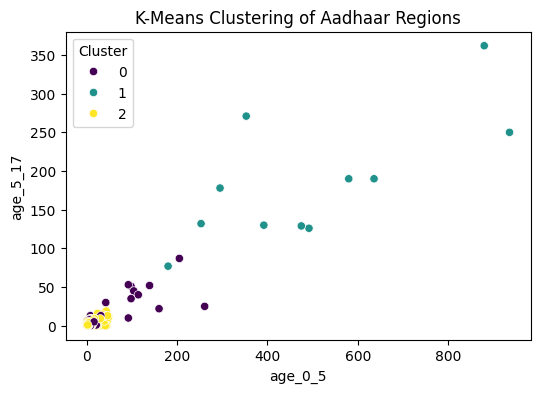

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

cluster_features = df[['age_0_5', 'age_5_17', 'age_18_greater']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Silhouette Score:", silhouette_score(scaled_features, df['Cluster']))

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['age_0_5'],
    y=df['age_5_17'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("K-Means Clustering of Aadhaar Regions")
plt.show()


In [ ]:
import joblib, os

os.makedirs("../models", exist_ok=True)

joblib.dump(xgb_model, "../models/xgboost_model.pkl")
joblib.dump(iso_model, "../models/isolation_forest.pkl")
joblib.dump(kmeans, "../models/kmeans.pkl")
joblib.dump(scaler, "../models/kmeans_scaler.pkl")

print("All models saved successfully ✅")


NameError: name 'xgb_model' is not defined